Lokasi Knot: [3.75 6.5  9.25]
[[ 1.    0.    0.    0.  ]
 [ 2.    0.    0.    0.  ]
 [ 3.    0.    0.    0.  ]
 [ 4.    0.25  0.    0.  ]
 [ 5.    1.25  0.    0.  ]
 [ 6.    2.25  0.    0.  ]
 [ 7.    3.25  0.5   0.  ]
 [ 8.    4.25  1.5   0.  ]
 [ 9.    5.25  2.5   0.  ]
 [10.    6.25  3.5   0.75]
 [12.    8.25  5.5   2.75]
 [15.   11.25  8.5   5.75]]
Shape Data: (12, 4)


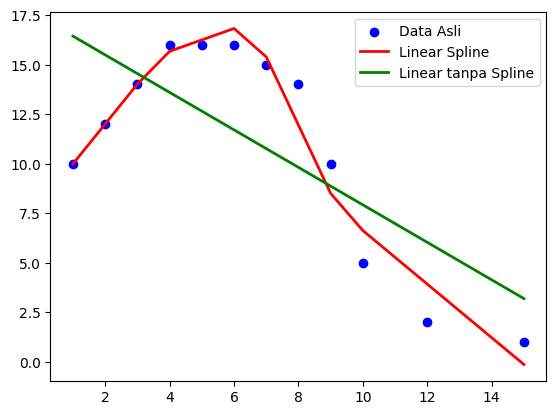

In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 1. PERSIAPAN DATA (Contoh Sederhana)
# Anggap ini data tanggal kamu yang sudah diubah jadi angka (hari ke-sekian)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15]).reshape(-1, 1)
y = np.array([10, 12, 14, 16, 16, 16, 15, 14, 10, 5, 2, 1]) # Pola naik lalu turun

# 2. TENTUKAN KNOT (Pakai Quantile seperti rencanamu)
knots = np.percentile(X, [25, 50, 75]) # Multiknot (3 titik)
print(f"Lokasi Knot: {knots}")

# 3. FEATURE ENGINEERING (Bikin Kolom ReLU/Spline tadi)
# Kita buat fungsi manual biar kamu paham "jeroannya"
def create_spline_features(X, knots):
    X_new = X.copy()
    for k in knots:
        # Rumus: max(0, x - knot)
        # Ini membuat kolom baru untuk setiap knot
        new_col = np.maximum(0, X - k)
        X_new = np.hstack([X_new, new_col])
    return X_new

X_spline = create_spline_features(X, knots)
print(X_spline)
# Cek bentuk data sekarang
# Awalnya (12 baris, 1 kolom) -> Sekarang (12 baris, 4 kolom)
print(f"Shape Data: {X_spline.shape}") 

# 4. FITTING LINEAR REGRESSION
model = LinearRegression()
model.fit(X_spline, y) # Masukkan data yang sudah "dimekarkan"

# Prediksi untuk melihat hasilnya
y_pred = model.predict(X_spline)

lr_without_spline = LinearRegression()
lr_without_spline.fit(X, y)

y_pred_no_spline = lr_without_spline.predict(X)

# Plotting
plt.scatter(X, y, color='blue', label='Data Asli')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Spline')
plt.plot(X, y_pred_no_spline, color='green', linewidth=2, label='Linear tanpa Spline')
plt.legend()
plt.show()